# Testing

Say we want to perform a test to detect the presence or absence of some condition. For example, we might want to detect whether someone has fallen victim to some imaginary disease, like CORVID-18 (a rare witch-induced fugue-state that convinced sufferers they were crows, discovered in 1618).

We can divide all elements (people, say) into two sets: 

* +ve (crow-believers) **CROW**
* -ve (unwitched) **NORMAL**

We can then administer the test to an element -- perhaps pushing a victim off a high ledge and seeing if they flap their "wings" -- and we will get either:

* a +ve result **FLAP** or
* a -ve result **SCREAM**. 

Since tests are not reliable (some of the unwitched will still flap their arms like wings, some crow-infected will be too shocked to try) we will have to work out how likely it was the element was truly +ve given the test result. It's not like we can push them off a ledge again.

The usefulness of this test can be characterised in many ways:

* How likely is it that I'm a sufferer if I test positive? P(**CROW**|**FLAP**)
* What percentage of the population will test negative? P(**SCREAM**)

These questions can be boiled down to three critical dimensions. Although there are many ways to characterise them, we will use:

* **sensitivity** 
* **specificity**
* **base rate** proportion the total population that are +ve

It will also be important how big the population is in total $N$, and how large any samples we take of this population $n$.

---

Every test/scenario combination corresponds to a 3-tuple $T=(b, e, p)$: (**b**ase rate, s**e**nsitivity, s**p**ecificity). With those three numbers, we can transform to or from any other representation of test reliability (like precision, recall, false negative rate, etc.)

These points correspond to coordinates in a unit cube with bottom left corner on the axes at (0,0,0), stretching to (1,1,1). Every test pair $(e,p)$ represents a horizontal line in this space. Every condition base rate $b$ represents a plane in this space.


### Remapping coordinates
We are rarely interested in problems where the condition is highly prevalent, and most elements are positive (and we can always switch the polarity of our condition if we need to, and test for **NOT-A-CROW** instead). Likewise, we are unlikely to bother with a test which is extremely unreliable, and thus has sensitivity or specificity <50% (though we might encounter them).

This means we will typically have:
* sensitivity, less than but very close to 1.0
* specificity, less than but very close to 1.0
* base rate, positive and very close to 0.0

To visualise things more clear, we will remap these values using a kind of logit (log-odds) transform.

$$\text{logit}{(p)} = \log\left({\frac{p}{1-p}}\right)$$

We'll modify it slightly so that all values are mapped in the range $[0, \infty]$ using a function $\text{nl}(p)$. 

* Probabilities < 0.5 (odds greater than 1:1) are mapped to themselves [0, 0.5]
* Probabilities > 0.5 (odds less than 1:1) are mapped to base 10 logits,  so that 0.5=1:1, 10=1:10, 20=1:100, 30=1:1000 and so on.

We will remap base rate to (1-base rate), so our tuple is transformed to:

$$T_n = (\text{nl}(1-b), \text{nl}(e), \text{nl}(p))$$



999:1
[-4.77121255  0.          9.54242509 19.95635195 29.99565488 49.99995657]


C:\local\anaconda3\envs\pymc3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
C:\local\anaconda3\envs\pymc3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


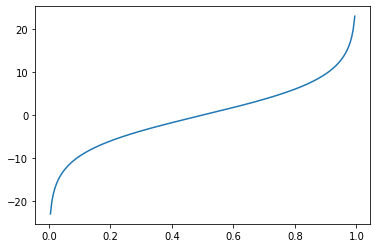

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def logit_curve(p):
    return np.where(p<0.5, p, 10 * np.log10(p / (1-p)) + 0.5)

def inv_logit_curve(p):
    q = (p - 0.5) / 0.7
    return np.where(p<0.5, p, (10**q)/(10**q+1))


def logit_curve(p):
    return 10 * np.log10(p / (1-p))

def inv_logit_curve(p):
    q = p /10.0
    return (10**q)/(10**q+1)

def n_to_1(p):
    if p < 0.5:        
        return f"{(1-p) / (p):.0f}:1"
    else:   
        return f"1:{(p) / (1-p):.0f}"
    
print(n_to_1(0.001))

ps = np.linspace(0,1,200)
plt.plot(ps, logit_curve(ps))

def tn(b, e, p):
    return logit_curve(1-b), logit_curve(e), logit_curve(p)

print(logit_curve(np.array([0.25, 0.5, 0.9, 0.99, 0.999, 0.99999])))

In [2]:

print(logit_curve(0.999), logit_curve(0.995))
print(logit_curve(0.887), logit_curve(0.906))
print(logit_curve(0.938), logit_curve(0.956))


29.99565488225982 22.988530764097064
8.948451763483067 9.840003440771145
11.7981114888081 13.370052157899124


In [3]:
def tp(b, e, p):
    return  b * e

def fp(b, e, p):
    return  (1-b) * (1-p)

def fn(b, e, p):
    return  b * (1-e)

def tn(b, e, p):
    return (1-b) * p

def ppv(tp, fp, fn, tn):
    return tp / (tp + fp)

def npv(tp, fp, fn, tn):
    return tn / (fn + tn)


e = inv_logit_curve(10.0)
p = inv_logit_curve(10.0)
b = 1-inv_logit_curve(2.0)

logit_curve(npv(tp(b,e,p), fp(b,e,p), fn(b,e,p), tn(b,e,p)))



11.999999999999995

In [4]:
import panel as pn
pn.extension('vtk')
print(pn.pane.vtk.enums.PRESET_CMAPS)

ModuleNotFoundError: No module named 'panel'

In [138]:
import numpy as np

drange = np.linspace(0, 40, 50).astype(np.float32)

dx, dy, dz = np.meshgrid(drange, drange, drange)

b, e, p = 1-inv_logit_curve(dx), inv_logit_curve(dy), inv_logit_curve(dz)

data_matrix =npv(tp(b,e,p), fp(b,e,p), fn(b,e,p), tn(b,e,p))

pn.pane.VTKVolume(data_matrix, sizing_mode='stretch_width', height=400, spacing=(1,1,1), colormap='Plasma (matplotlib)', 
                  interpolation='nearest', edge_gradient=0, sampling=0)

VTKVolume(ndarray, colormap='Plasma (matplotlib)', edge_gradient=0, height=400, interpolation='nearest', sampling=0, sizing_mode='stretch_width', slice_i=24, slice_j=24, slice_k=24)